In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# random data generation
SAMPLE_NUMBER = 1000

negatives = np.random.multivariate_normal(
    mean = [0, 2],
    cov  = [[1, 0.5], [0.5, 1]],
    size = SAMPLE_NUMBER
)

positives = np.random.multivariate_normal(
    mean = [2.5, 0],
    cov  = [[1, 0.5], [0.5, 1]],
    size = SAMPLE_NUMBER
)

In [27]:
Xs = np.vstack((negatives, positives)).astype(np.float32)
ys = np.vstack((np.zeros((SAMPLE_NUMBER, 1), dtype = np.float32),
                np.ones(( SAMPLE_NUMBER, 1), dtype = np.float32)))

Xs.shape, ys.shape

((2000, 2), (2000, 1))

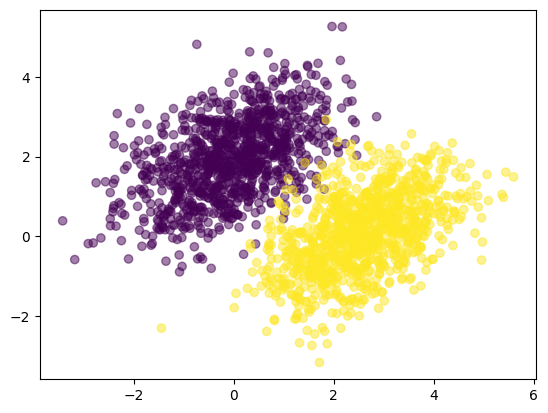

In [28]:
plt.scatter(Xs[:, 0], Xs[:, 1], c = ys[:, 0], alpha = .5)

In [29]:
# build the linear classifier
input_dim = 2
output_dim = 1
learning_rate = 0.1

In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, input_shape = (2,), activation = "relu"),
    tf.keras.layers.Dense(64, activation = "relu"),
    tf.keras.layers.Dense(64, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["acc"])

In [31]:
model.fit(Xs, ys, epochs = 500, verbose = 0)

In [32]:
y_pred = model.predict(Xs)

63/63 [==============================] - 0s 1ms/step


In [33]:
model.evaluate(Xs, ys)

63/63 [==============================] - 0s 2ms/step - loss: 0.0146 - acc: 0.9945


[0.01458920631557703, 0.9944999814033508]

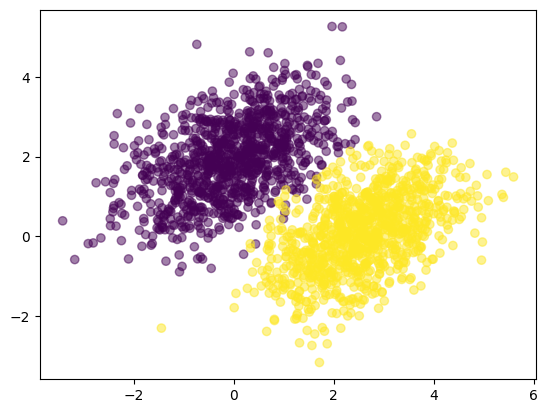

In [34]:
plt.scatter(Xs[:, 0], Xs[:, 1], c = y_pred[:, 0] > .5, alpha = .5)